In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [46]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor

In [3]:
train= pd.read_csv("Train.csv")
test= pd.read_csv("Test.csv")
submission=pd.read_csv("sample_submission.csv")

In [4]:
train_preprocessed=pd.read_csv("train_preprocessed.csv")
test_preprocessed=pd.read_csv("test_preprocessed.csv")

In [6]:
train_preprocessed.head()

,Relationship_Status_Married,Relationship_Status_Single,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Accounting and Finance,Unit_Human Resource Management,Unit_IT,...,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR3,VAR5,VAR6,VAR7,Attrition_rate
0,1,0,0,1,0,0,0,0,0,1,...,1,1,7.0,3.0,4,1.8688,4,5,3,0.1841
1,0,1,0,0,0,1,0,0,0,0,...,0,3,6.0,4.0,3,-0.4537,3,5,3,0.0670
2,1,0,1,0,0,0,0,0,0,0,...,0,2,8.0,1.0,4,-0.4537,3,8,3,0.0851
3,0,1,0,0,1,0,0,0,1,0,...,1,3,8.0,1.0,3,-0.4537,3,7,3,0.0668
4,1,0,0,0,0,1,0,0,0,0,...,1,3,2.0,3.0,1,-0.4537,2,8,2,0.1827


In [14]:
test_preprocessed=test_preprocessed.drop(['Attrition_rate'], axis=1)

In [15]:
test_preprocessed.head()

,Relationship_Status_Married,Relationship_Status_Single,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Accounting and Finance,Unit_Human Resource Management,Unit_IT,...,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR3,VAR5,VAR6,VAR7
0,0,1,0,0,0,1,0,0,0,0,...,30,1,5,4.0,1.0,3,-0.4537,1,8,4
1,0,1,0,0,1,0,0,0,0,1,...,72,1,1,1.0,1.0,4,0.7075,2,8,2
2,1,0,0,0,0,1,0,0,0,0,...,25,0,1,8.0,1.0,4,0.7075,1,9,3
3,0,1,0,0,0,0,1,0,0,0,...,28,1,1,2.0,4.0,3,0.7075,2,8,3
4,1,0,0,1,0,0,0,0,0,0,...,47,1,3,2.0,4.0,4,0.7075,2,7,4


In [5]:
model = LinearRegression()

In [7]:
X = train_preprocessed.drop(columns=["Attrition_rate"])

In [8]:
y = train_preprocessed["Attrition_rate"]

In [9]:
model.fit(X,y)

LinearRegression()

In [10]:
mean_squared_error(y, model.predict(X),squared=False)

0.18510948751471815

In [16]:
X_test = test_preprocessed

In [17]:
y_pred = model.predict(X_test)

In [18]:
y_pred

array([0.21111055, 0.18759616, 0.1899154 , ..., 0.15970619, 0.15483183,
       0.19957222])

In [37]:
Result=pd.DataFrame()

In [38]:
Result

""


In [39]:
Result["Employee_ID"]  = test["Employee_ID"]

In [40]:
Result["Attrition_rate"]  = y_pred

In [41]:
Result

,Employee_ID,Attrition_rate
0,EID_22713,0.211111
1,EID_9658,0.187596
2,EID_22203,0.189915
3,EID_7652,0.237828
4,EID_6516,0.209156
...,...,...
2995,EID_22547,0.196116
2996,EID_10066,0.190929
2997,EID_7126,0.159706
2998,EID_4929,0.154832


In [42]:
Result.to_csv("linear_regression_result.csv", index = False)

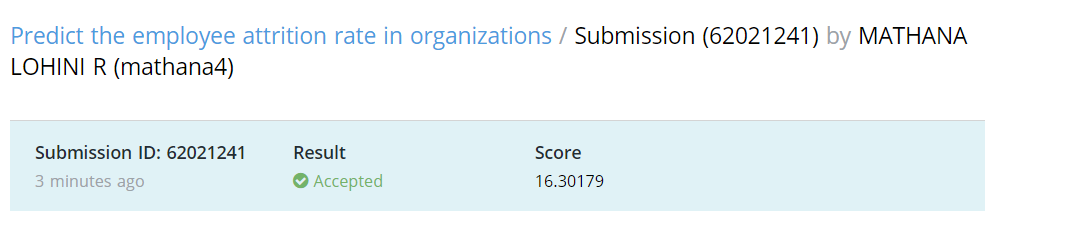

In [43]:
from IPython.display import Image
Image(filename='LinearRegressionResult.png')

In [55]:
sample_test= pd.read_csv("sample_test.csv")

In [56]:
sample_test["Employee_ID"]=test["Employee_ID"]

In [57]:
def model_fit(model, train_X, train_y, test_X, sample_test, filename):
    model.fit(train_X, train_y)
    train_pred = np.abs(model.predict(train_X))
    print("Train RMSE : ",mean_squared_error(np.log1p(train_y), np.log1p(train_pred), squared=False))
    test_pred = model.predict(test_X)
    sample_test['Attrition_rate'] = np.abs(test_pred)
    sample_test.to_csv(filename, index = False)
    return mean_squared_error(np.log1p(train_y), np.log1p(train_pred), squared=False)
        
    

In [58]:
model = [LinearRegression(), Ridge(), Lasso(), ElasticNet(), KNeighborsRegressor()]

In [59]:
for i in model:
    print(i)
    model_fit(i, X, y, X_test, sample_test, str(i)[:-2]+".csv")

LinearRegression()
Train RMSE :  0.13854767014253333
Ridge()
Train RMSE :  0.13854753823519367
Lasso()
Train RMSE :  0.13899226887678426
ElasticNet()
Train RMSE :  0.13899226887678426
KNeighborsRegressor()
Train RMSE :  0.12427145442869193


# RESULT

## Linear Regression

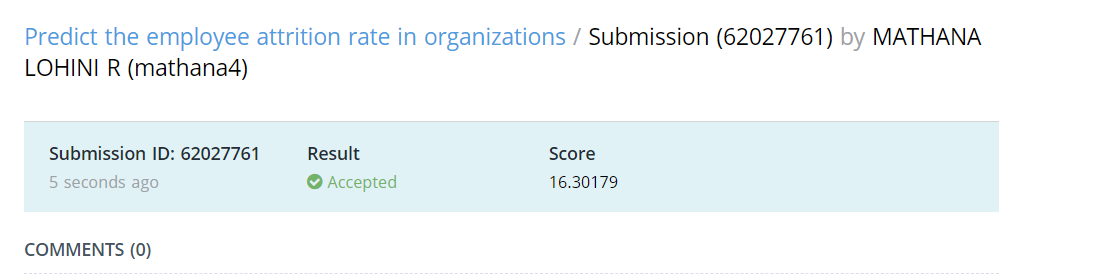

In [61]:
Image(filename='LinearRegression2.png')

## Ridge

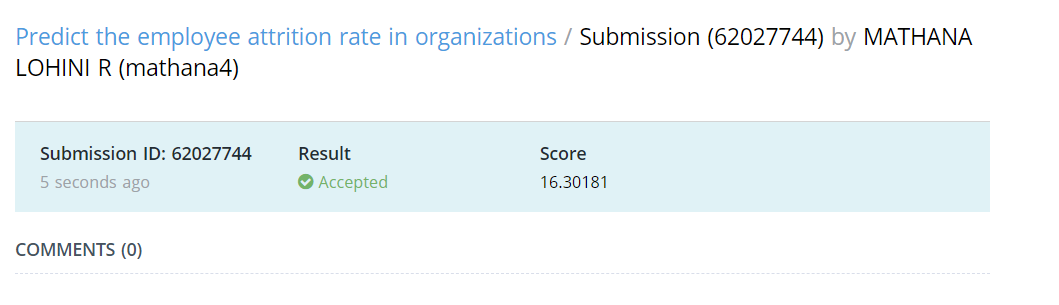

In [65]:
Image(filename='RidgeResult.png')

## Lasso

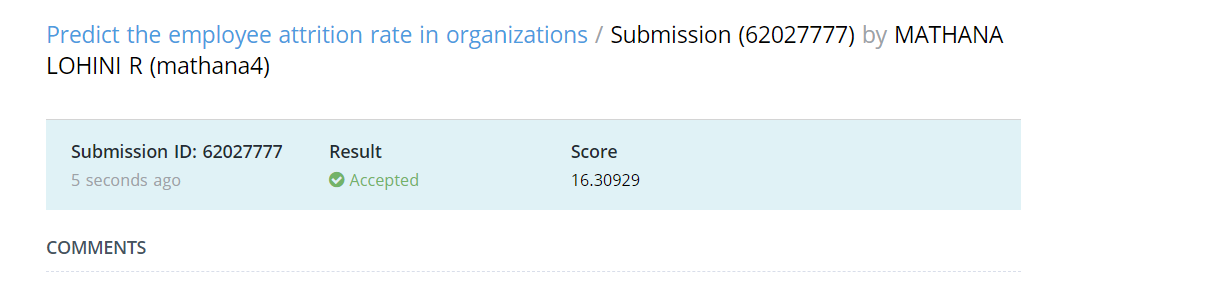

In [66]:
Image(filename='LassoResult.png')

## ElasticNet

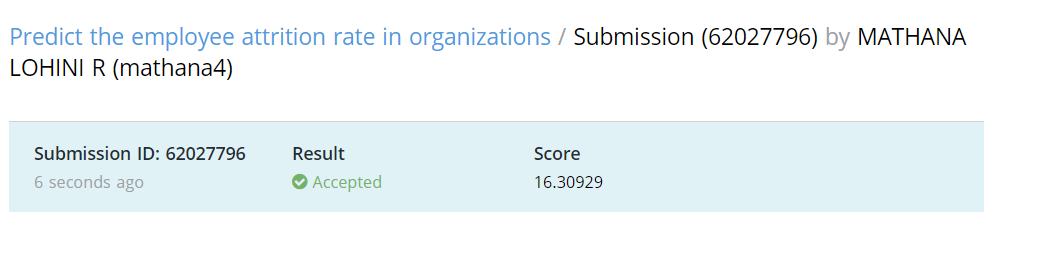

In [67]:
Image(filename='ElasticNetResult.png')

## KNeighborsRegressor

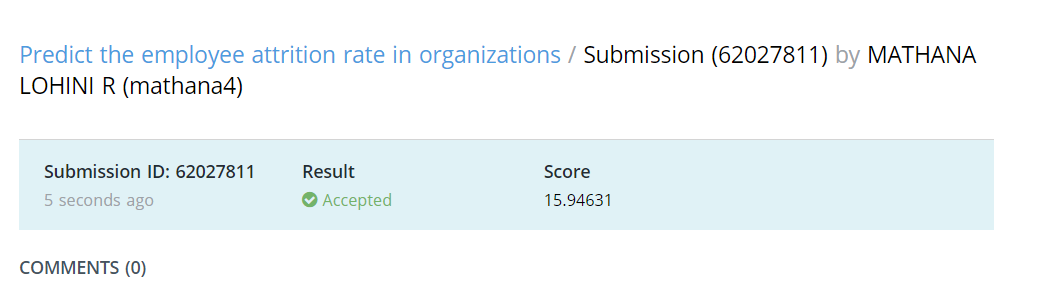

In [68]:
Image(filename='KNNResult.png')